# 데이터 보기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc('font',family='Malgun Gothic' )
!pip install koreanize-matplotlib
from IPython.display import display
import koreanize_matplotlib
import seaborn as sns

origin_data1=pd.read_csv("C:/Users/USER/Downloads/Titanic-Dataset.csv")

In [3]:
data=origin_data1.copy()
print(data.shape)
data.isnull().sum()

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Axes(0.125,0.11;0.775x0.77) Axes(0.125,0.11;0.775x0.77)


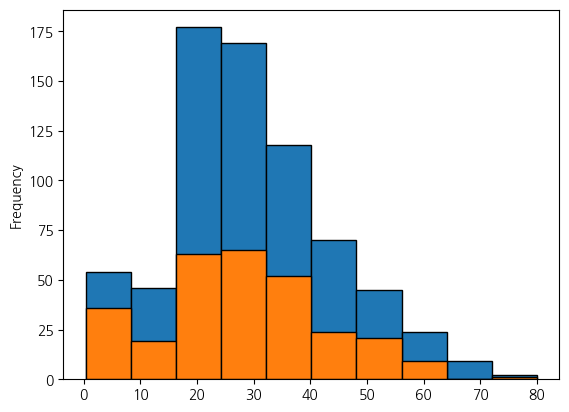

In [4]:
data["Sur1"]=data["Survived"].astype("str")
print(data["Age"].plot(kind="hist",edgecolor="black"),data[data["Survived"]==1]["Age"].plot(kind="hist",edgecolor="black") )


## **->Age 변수는 생존률에 영향을 주는 변수처럼 보입니다. 결측치를 버리기에는 아까우니 최대한 채우는 게 합당해보임**

In [6]:
data1=data[data["Cabin"].isnull()==False]
data1=data1.copy()
data1.loc[:, "room"] = ""
data1.loc[data1["Cabin"].str.startswith("A"),"room"]="A"
data1.loc[data1["Cabin"].str.startswith("B"),"room"]="B"
data1.loc[data1["Cabin"].str.startswith("C"),"room"]="C"
data1.loc[data1["Cabin"].str.startswith("D"),"room"]="D"
data1.loc[data1["Cabin"].str.startswith("E"),"room"]="E"
data1.loc[data1["Cabin"].str.startswith("F"),"room"]="F"
data1.loc[data1["Cabin"].str.startswith("G"),"room"]="G"
data1.loc[data1["Cabin"].str.startswith("T"),"room"]="T"
print(data1["room"].value_counts())
data1["room"].describe()
data.loc[data1.index,"room"]=data1["room"]
data

room
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,C


In [7]:
data1.groupby("room")["Survived"].sum()/data1.groupby("room")["Survived"].count()

room
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

## **->Cabin(객실)의 앞글자는 층(구역), 숫자는 방의호수를 의미하며 층(구역)은 위치와 관련이 있을 것 같아 room변수를 생성해 생존률을 비교해봤다**
 - room에 따라 생존률의 차이가 있고, 예를 들면, 구명정과 가까운 위치는 생존률이 좀 높다던가 앞부분은 생존률이 좀 떨어진다던가의 차이가 있을 것 같아 room만 채워보자

# 전처리 
 * Age는 어떻게 채울 것인가? 변수중에서 age에 대한 정보를 알 수 있을 것 같은 변수를 생각해보자
 * SipSb가 1이상이다. -> 같이 탑승한 형제,자매가 있다 -> 형제, 자매의 나이는 대부분 비슷하다. & 성이 같은 사람은 가족이다. -> SipSb가 1이상이고 성이 같은 사람의 나이 평균 집어 넣기
 * "Name"을 보면 사실 데이터 구분을 위한 정보처럼 보이지만 서양의 이름에는 "Mrs", "Miss", "Master"와 같은 것들이 있는데 이들은
   - Mr: 18세 이상 남성
   - Miss : 미혼 여성
   - Mrs : 기혼 여성
   - Master : 13세이하 남성
   - Dr : 박사, 의사
   -> 이런 정보를 기반으로 집어 넣기

In [10]:
# 성이 같은 사람들 firstname 변수 만들기
data["Firstname"]=data["Name"].str.split(",").str[0]#firstname 변수 생성
print(data["Firstname"])


0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Firstname, Length: 891, dtype: object


In [11]:
data["Title"]=data["Name"].str.split(",").str[1].str.split(".").str[0] #title 변수 생성
print(data["Title"])
data_yes_age=data[~data["Age"].isnull()]
data_no_age=data[data["Age"].isnull()]
data_no_age

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: Title, Length: 891, dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,NaN,Moran,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,NaN,Williams,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,NaN,Masselmani,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0,NaN,Emir,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,NaN,O'Dwyer,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0,NaN,Razi,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0,NaN,Sage,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0,NaN,van Melkebeke,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,0,NaN,Laleff,Mr


In [12]:
for i in range(len(data_no_age)):
    tmp=[]
    if data_no_age.iloc[i]["SibSp"]>1 : #age변수가 결측치고 SibSp가 1이상이면
        for j in range(len(data_yes_age)):
            if data_no_age.iloc[i]["Firstname"] == data_yes_age.iloc[j]["Firstname"] :
                tmp.append(data_yes_age.iloc[j]["Firstname"])
        if len(tmp) > 0 :
            data_no_age.loc[data_no_age.index[i] ,"Age" ] = int(sum(tmp) / len(tmp))
print(data_no_age.isnull().sum()) 
#하나도 채워지지 않았다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          158
Embarked         0
Sur1             0
room           158
Firstname        0
Title            0
dtype: int64


In [13]:
data_no_age[data_no_age["SibSp"]>0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1,B,Spencer,Mrs
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q,0,NaN,Lennon,Mr
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,0,NaN,Samaan,Mr
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,1,NaN,Moubarek,Master
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,1,NaN,Moran,Miss
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,1,F,Peter,Miss
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,0,NaN,Sage,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,0,NaN,Lefebre,Master
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0,NaN,Sage,Miss
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,1,NaN,O'Brien,Mrs


In [14]:
display(data[data["Name"].str.startswith("Spencer,")] )
print("_________________________")
display(data[data["Name"].str.startswith("Sage,")])
print("_____________________")
display(data[data["Name"].str.startswith("Lefebre,")])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1,B,Spencer,Mrs


_________________________


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,0,NaN,Sage,Master
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,0,NaN,Sage,Miss
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,0,NaN,Sage,Mr
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,0,NaN,Sage,Mr
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,0,NaN,Sage,Miss
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,0,NaN,Sage,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,0,NaN,Sage,Miss


_____________________


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,0,NaN,Lefebre,Master
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,0,NaN,Lefebre,Miss
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S,0,NaN,Lefebre,Miss
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,0,NaN,Lefebre,Miss


## 확인해보니 형제 자매가 1명이상 탑승하고 성이 같은 사람들은 한명이 결측치면 모두 결측치인 것 같다. 

In [16]:
data_no_age["Title"].value_counts() #title별 결측치 확인

Title
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64

## 정말정말 다행히도 mr, miss, master, mrs, dr 외에는 결측치가 없다

# **시뮬레이션에 대한 고찰**
 * 모델링을 하는 데 결측치를 단일 평균 혹은 중위수로 채워 넣는 것보단, 최대한 분포를 고려해 적절해보이는 값으로 채워 넣어 모델링하는 것이 타당하다 생각합니다
 * 이런 관점에서 분포를 고려한 시뮬레이션은 데이터의 불확실성을 반영해준다는 점에서도 매력적으로 느껴집니다
 * 하지만 시뮬레이션의 경우 한번 시행마다 값이 달라지고 이는 모델의 정확도에도 영향을 미치며 이는 시뮬레이션의 한계이기도 합니다
 * 따라서 이 과정에서의 오차를 줄이고자 시뮬레이션 과정을 random_state를 매개변수로 하는 함수로 만들어 후에 모델링 과정에서 random_state을 기록해 최적의 모델을 탐색해보려 합니다.

### **Mr**

Pclass별 mr의 분포가 차이가 있어보인다 


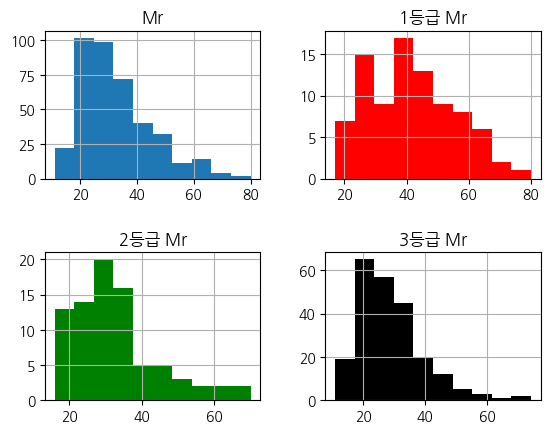

In [20]:
plt.subplot(2,2,1)
data_yes_age[data_yes_age["Title"]==" Mr"]["Age"].hist()
plt.title("Mr")
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(2,2,2)
data_yes_age[(data_yes_age["Title"]==" Mr") & (data_yes_age["Pclass"]==1)]["Age"].hist(color="red")
plt.title("1등급 Mr")
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(2,2,3)
data_yes_age[(data_yes_age["Title"]==" Mr") & (data_yes_age["Pclass"]==2)]["Age"].hist(color="green")
plt.title("2등급 Mr",)
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(2,2,4)
data_yes_age[(data_yes_age["Title"]==" Mr") & (data_yes_age["Pclass"]==3)]["Age"].hist(color="black")
plt.title("3등급 Mr")
plt.subplots_adjust(wspace=0.3, hspace=0.5)

print("Pclass별 mr의 분포가 차이가 있어보인다 ")

In [21]:
data_no_age_mr=data_no_age[data_no_age["Title"]==" Mr"]
data_yes_age_mr1=data_yes_age[(data_yes_age["Title"]==" Mr") & (data_yes_age["Pclass"]==1)]
data_yes_age_mr2=data_yes_age[(data_yes_age["Title"]==" Mr") & (data_yes_age["Pclass"]==2)]
data_yes_age_mr3=data_yes_age[(data_yes_age["Title"]==" Mr") & (data_yes_age["Pclass"]==3)]



def making_mr_age(random_number):
    for i in range(len(data_no_age_mr)):
        if data_no_age_mr.iloc[i]["Pclass"]==1:
            data_no_age_mr.loc[data_no_age_mr.index[i],"Age"] = int(data_yes_age_mr1["Age"].sample(n=30,replace=True,random_state=random_number).mean())
        elif data_no_age_mr.iloc[i]["Pclass"]==2:
            data_no_age_mr.loc[data_no_age_mr.index[i],"Age"] = int(data_yes_age_mr2["Age"].sample(n=30,replace=True,random_state=random_number).mean())
        elif data_no_age_mr.iloc[i]["Pclass"]==3:
            data_no_age_mr.loc[data_no_age_mr.index[i],"Age"] = int(data_yes_age_mr3["Age"].sample(n=30,replace=True,random_state=random_number).mean())
        random_number += 1
    data.loc[data_no_age_mr.index,"Age"]=data_no_age_mr["Age"]
making_mr_age(2)


In [22]:
data[data["Title"]==" Mr"].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          424
Embarked         0
Sur1             0
room           424
Firstname        0
Title            0
dtype: int64

## miss
 * Mr와는 다르게 miss는 "미혼" 여성에게만 붙는다.
 * parch 변수를 보자 -> 같이 탄 "부모or자식"인데 미혼인데 자식은 없을 거고 부모가 같이 탔다면, 나이가 적을 확률이 높다 

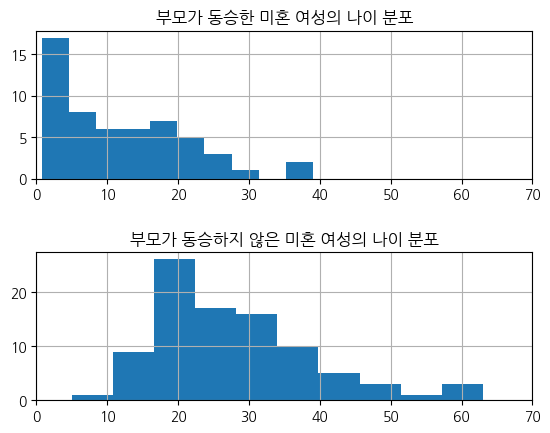

In [24]:
plt.subplot(2,1,1)
data[(data["Name"].str.contains("Miss")) & (data["Parch"]>0)]["Age"].hist()
plt.title("부모가 동승한 미혼 여성의 나이 분포")
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.xlim(0,70)

plt.subplot(2,1,2)
data[(data["Name"].str.contains("Miss")) & (data["Parch"]==0)]["Age"].hist()
plt.title("부모가 동승하지 않은 미혼 여성의 나이 분포")
plt.xlim(0,70)
plt.subplots_adjust(wspace=0.3, hspace=0.5)
#둘은 분리하는게 맞다

In [25]:
data_miss_pch0=data[(data_yes_age["Name"].str.contains("Miss")) & (data["Parch"]==0)]
data_miss_pch1=data[(data_yes_age["Name"].str.contains("Miss")) & (data["Parch"]>0)]
print(data_miss_pch0.groupby("Pclass")["Age"].mean())
print(data_miss_pch1["Pclass"].value_counts())
data_no_age_miss=data_no_age[data_no_age["Title"]==" Miss"]
display(data_no_age_miss)

Pclass
1    34.965517
2    30.500000
3    21.697674
Name: Age, dtype: float64
Pclass
3    26
1    16
2    13
Name: count, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,NaN,O'Dwyer,Miss
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,1,NaN,Glynn,Miss
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,1,NaN,O'Driscoll,Miss
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q,1,NaN,McDermott,Miss
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,1,NaN,Moran,Miss
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,1,F,Peter,Miss
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0,NaN,Sage,Miss
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q,1,NaN,Madigan,Miss
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,0,NaN,Lefebre,Miss
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S,0,NaN,Harknett,Miss


In [26]:
data_no_age_miss_pch1=data[(data_no_age["Name"].str.contains("Miss")) & (data["Parch"]>0)]
data_no_age_miss_pch0=data[(data_no_age["Name"].str.contains("Miss")) & (data["Parch"]==0)]

data_yes_age_miss_pch1_p1=data_miss_pch1[data_miss_pch1["Pclass"]==1]
data_yes_age_miss_pch1_p2=data_miss_pch1[data_miss_pch1["Pclass"]==2]
data_yes_age_miss_pch1_p3=data_miss_pch1[data_miss_pch1["Pclass"]==3]

data_yes_age_miss_pch0_p1=data_miss_pch0[data_miss_pch0["Pclass"]==1]
data_yes_age_miss_pch0_p2=data_miss_pch0[data_miss_pch0["Pclass"]==2]
data_yes_age_miss_pch0_p3=data_miss_pch0[data_miss_pch0["Pclass"]==3]




In [27]:
random_num=1
def making_miss_age_pch1(random_num):
    for i in range(len(data_no_age_miss_pch1)):    
        if data_no_age_miss_pch1.iloc[i]["Pclass"]==1:
            data_no_age_miss_pch1.loc[data_no_age_miss_pch1.index[i],"Age"]=int( data_yes_age_miss_pch1_p1["Age"].sample(n=20,replace=True,random_state=random_num).mean())
        elif data_no_age_miss_pch1.iloc[i]["Pclass"]==2:
            data_no_age_miss_pch1.loc[data_no_age_miss_pch1.index[i],"Age"]=int( data_yes_age_miss_pch1_p2["Age"].sample(n=20,replace=True,random_state=random_num).mean())
        elif data_no_age_miss_pch1.iloc[i]["Pclass"]==3:
            data_no_age_miss_pch1.loc[data_no_age_miss_pch1.index[i],"Age"]=int( data_yes_age_miss_pch1_p3["Age"].sample(n=20,replace=True,random_state=random_num).mean())
        random_num += 1
    data.loc[data_no_age_miss_pch1.index,"Age"]=data_no_age_miss_pch1["Age"]

def making_miss_age_pch0(random_num):
    for i in range(len(data_no_age_miss_pch0)):    
        if data_no_age_miss_pch0.iloc[i]["Pclass"]==1:
            data_no_age_miss_pch0.loc[data_no_age_miss_pch0.index[i],"Age"]=int( data_yes_age_miss_pch0_p1["Age"].sample(n=20,replace=True,random_state=random_num).mean())
        elif data_no_age_miss_pch0.iloc[i]["Pclass"]==2:
            data_no_age_miss_pch0.loc[data_no_age_miss_pch0.index[i],"Age"]=int( data_yes_age_miss_pch0_p2["Age"].sample(n=20,replace=True,random_state=random_num).mean())
        elif data_no_age_miss_pch0.iloc[i]["Pclass"]==3:
            data_no_age_miss_pch0.loc[data_no_age_miss_pch0.index[i],"Age"]=int( data_yes_age_miss_pch0_p3["Age"].sample(n=20,replace=True,random_state=random_num).mean())
        random_num += 1
    data.loc[data_no_age_miss_pch0.index,"Age"]=data_no_age_miss_pch0["Age"]

making_miss_age_pch1(random_num)
making_miss_age_pch0(random_num)

data[data["Title"]==" Miss"].loc[data_no_age_miss.index]["Age"]



28     21.0
32     21.0
47     21.0
82     19.0
109    20.0
128     6.0
180     5.0
198    19.0
229     5.0
235    21.0
240    22.0
241    24.0
264    19.0
274    22.0
300    21.0
303    27.0
306    31.0
330    22.0
358    20.0
359    20.0
368    18.0
409     8.0
485     4.0
502    21.0
564    22.0
573    20.0
593     6.0
596    33.0
612    21.0
653    23.0
680    20.0
697    22.0
727    19.0
792     6.0
863     8.0
888     4.0
Name: Age, dtype: float64

## master 
 * master라는 호칭은 18~19세기 서양에서 12세 이하의 남자아이들에게 사용되었다.

In [29]:
display(data[data["Title"]==" Master"]["Pclass"].value_counts().reset_index())
print(data[data["Title"]==" Master"]["Age"].max())
display(data[data["Title"]==" Master"].groupby("Pclass")["Age"].mean().reset_index())


,Pclass,count
0,3,28
1,2,9
2,1,3


12.0


,Pclass,Age
0,1,5.306667
1,2,2.258889
2,3,5.350833


In [30]:
data_no_age_master=data_no_age[data_no_age["Title"]==" Master"]
data_yes_age_master1=data_yes_age[(data_yes_age["Title"]==" Master") & (data_yes_age["Pclass"]==1)]
data_yes_age_master2=data_yes_age[(data_yes_age["Title"]==" Master") & (data_yes_age["Pclass"]==2)]
data_yes_age_master3=data_yes_age[(data_yes_age["Title"]==" Master") & (data_yes_age["Pclass"]==3)]



def making_master_age(random_number):
    for i in range(len(data_no_age_master)):
        if data_no_age_master.iloc[i]["Pclass"]==1:
            data_no_age_master.loc[data_no_age_master.index[i],"Age"] = int(data_yes_age_master1["Age"].sample(n=30,replace=True,random_state=random_number).mean())
        elif data_no_age_master.iloc[i]["Pclass"]==2:
            data_no_age_master.loc[data_no_age_master.index[i],"Age"] = int(data_yes_age_master2["Age"].sample(n=30,replace=True,random_state=random_number).mean())
        elif data_no_age_master.iloc[i]["Pclass"]==3:
            data_no_age_master.loc[data_no_age_master.index[i],"Age"] = int(data_yes_age_master3["Age"].sample(n=30,replace=True,random_state=random_number).mean())
        random_number += 1
    data.loc[data_no_age_master.index,"Age"]=data_no_age_master["Age"]
making_master_age(1)


In [31]:
data[data["Title"]==" Master"].loc[data_no_age_master.index]["Age"]

65     5.0
159    5.0
176    5.0
709    4.0
Name: Age, dtype: float64

## **Mrs**

In [33]:
data[data["Title"]==" Mrs"]["Age"].isnull().sum()

17

In [34]:
data_no_age_mrs=data_no_age[data_no_age["Title"]==" Mrs"]
data_yes_age_mrs1=data_yes_age[(data_yes_age["Title"]==" Mrs") & (data_yes_age["Pclass"]==1)]
data_yes_age_mrs2=data_yes_age[(data_yes_age["Title"]==" Mrs") & (data_yes_age["Pclass"]==2)]
data_yes_age_mrs3=data_yes_age[(data_yes_age["Title"]==" Mrs") & (data_yes_age["Pclass"]==3)]



def making_mrs_age(random_number):
    for i in range(len(data_no_age_mrs)):
        if data_no_age_mrs.iloc[i]["Pclass"]==1:
            data_no_age_mrs.loc[data_no_age_mrs.index[i],"Age"] = int(data_yes_age_mrs1["Age"].sample(n=30,replace=True,random_state=random_number).mean())
        elif data_no_age_mrs.iloc[i]["Pclass"]==2:
            data_no_age_mrs.loc[data_no_age_mrs.index[i],"Age"] = int(data_yes_age_mrs2["Age"].sample(n=30,replace=True,random_state=random_number).mean())
        elif data_no_age_mrs.iloc[i]["Pclass"]==3:
            data_no_age_mrs.loc[data_no_age_mrs.index[i],"Age"] = int(data_yes_age_mrs3["Age"].sample(n=30,replace=True,random_state=random_number).mean())
        random_number += 1
    data.loc[data_no_age_mrs.index,"Age"]=data_no_age_mrs["Age"]
making_mrs_age(1)


## **doctor**

In [36]:
display(data[data["Title"]==" Dr"]) # 여긴 결측치가 1개니까 평균을 넣어주도록하자
data.loc[766,"Age"]=data[data["Title"]==" Dr"]["Age"].mean()
data.loc[766]["Age"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,0,C,Minahan,Dr
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,0,NaN,Moraweck,Dr
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,0,NaN,Pain,Dr
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,1,B,Stahelin-Maeglin,Dr
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,1,NaN,Frauenthal,Dr
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,0,NaN,Brewe,Dr
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1,D,Leader,Dr


42.0

## 일단 Cabin(객실) 데이터에 대해 생각해보자
 * 객실 호수는 객실 위치와 관계 있을 것 같다. 만약 객실이 구명정과 가까이 있거나 배의 뒷부분이라면 생존확률에 영향을 줄 것 같기에 버리기보다는 채워 넣는 쪽을 선택
 * 정확한 호수까지는 알 수 없지만 앞의 알파벳정도는 채워 넣어야할 것 같다.
 * 객실과 관련 있을 것 같은 것들 생각해보자
   - 티켓 : 티켓 이름이 같으면 객실이 같을 것이다.
   - 티켓가격: 티켓 가격이 비슷하면 객실이 비슷할 것 같다.
   - 동승자 수 
   - Pclass : 같은 class 내에서는 객실이 같을 것 같다.

In [38]:
data_ticket=data["Ticket"].value_counts().reset_index()
display(data_ticket)
ticket_name=data_ticket[data_ticket["count"]>1]["Ticket"].tolist() #티켓 데이터 2개 이상 있는거 리스트로 바꾸기
ticket_name

,Ticket,count
0,347082,7
1,CA. 2343,7
2,1601,7
3,3101295,6
4,CA 2144,6
...,...,...
676,9234,1
677,19988,1
678,2693,1
679,PC 17612,1


['347082',
 'CA. 2343',
 '1601',
 '3101295',
 'CA 2144',
 '347088',
 'S.O.C. 14879',
 '382652',
 'LINE',
 'PC 17757',
 '17421',
 '349909',
 '113760',
 '4133',
 '113781',
 'W./C. 6608',
 '2666',
 '19950',
 '347077',
 'C.A. 31921',
 'PC 17572',
 'C.A. 34651',
 '363291',
 'F.C.C. 13529',
 '345773',
 '248727',
 '24160',
 '29106',
 'SC/Paris 2123',
 '35273',
 '371110',
 '230080',
 'PC 17760',
 '239853',
 'PC 17582',
 '347742',
 '110152',
 '13502',
 '110413',
 'PC 17755',
 'PC 17558',
 '237736',
 '17474',
 'PC 17758',
 'PP 9549',
 'S.O./P.P. 3',
 'P/PP 3381',
 'PC 17485',
 '2668',
 '2627',
 'PC 17604',
 '2653',
 '2665',
 '113798',
 '31027',
 '2908',
 'W./C. 6607',
 'WE/P 5735',
 '35281',
 '113789',
 '244367',
 '231919',
 '110465',
 'PC 17477',
 '2699',
 '367226',
 '113806',
 '230136',
 '111361',
 '113505',
 '113803',
 '370365',
 '364849',
 '358585',
 '250644',
 'C.A. 37671',
 '250647',
 '16966',
 '36928',
 '113776',
 '392096',
 'C.A. 33112',
 'A/4 48871',
 'STON/O2. 3101279',
 '2691',
 '2678

In [39]:
ticket_name # 숫자 , A , C.A, CA, PC, W./C.로 시작하는 애들이 있다.

['347082',
 'CA. 2343',
 '1601',
 '3101295',
 'CA 2144',
 '347088',
 'S.O.C. 14879',
 '382652',
 'LINE',
 'PC 17757',
 '17421',
 '349909',
 '113760',
 '4133',
 '113781',
 'W./C. 6608',
 '2666',
 '19950',
 '347077',
 'C.A. 31921',
 'PC 17572',
 'C.A. 34651',
 '363291',
 'F.C.C. 13529',
 '345773',
 '248727',
 '24160',
 '29106',
 'SC/Paris 2123',
 '35273',
 '371110',
 '230080',
 'PC 17760',
 '239853',
 'PC 17582',
 '347742',
 '110152',
 '13502',
 '110413',
 'PC 17755',
 'PC 17558',
 '237736',
 '17474',
 'PC 17758',
 'PP 9549',
 'S.O./P.P. 3',
 'P/PP 3381',
 'PC 17485',
 '2668',
 '2627',
 'PC 17604',
 '2653',
 '2665',
 '113798',
 '31027',
 '2908',
 'W./C. 6607',
 'WE/P 5735',
 '35281',
 '113789',
 '244367',
 '231919',
 '110465',
 'PC 17477',
 '2699',
 '367226',
 '113806',
 '230136',
 '111361',
 '113505',
 '113803',
 '370365',
 '364849',
 '358585',
 '250644',
 'C.A. 37671',
 '250647',
 '16966',
 '36928',
 '113776',
 '392096',
 'C.A. 33112',
 'A/4 48871',
 'STON/O2. 3101279',
 '2691',
 '2678

In [40]:
data[data["Ticket"].str.startswith("A")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,NaN,Braund,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0,NaN,Saundercock,Mr
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S,0,NaN,Cann,Mr
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S,0,NaN,Nosworthy,Mr
121,122,0,3,"Moore, Mr. Leonard Charles",male,28.0,0,0,A4. 54510,8.0500,NaN,S,0,NaN,Moore,Mr
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,0,NaN,Robins,Mrs
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S,0,NaN,Meo,Mr
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,0,NaN,van Billiard,Mr
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S,1,NaN,Cohen,Mr
212,213,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,NaN,S,0,NaN,Perkin,Mr


In [41]:
data[data["Ticket"].str.startswith("C.A")] #C.A로 시작하는 거 보니까 티켓값이 10.500인 애들은 F33이다. 얘네를 더보자

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.500,NaN,S,0,NaN,Wheadon,Mr
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.500,NaN,S,1,NaN,Rugg,Miss
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.750,NaN,S,1,NaN,West,Miss
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.500,F33,S,1,F,Nye,Mrs
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.500,NaN,S,0,NaN,Jenkin,Mr
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.575,NaN,S,0,NaN,Dean,Mr
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.000,NaN,S,0,NaN,Sobey,Mr
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.750,NaN,S,0,NaN,Nicholls,Mr
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.750,NaN,S,1,NaN,Watt,Mrs
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.500,NaN,S,0,NaN,Leyson,Mr


In [42]:
data_ticket_C_A=data[(data["Ticket"].str.startswith("C.A")) & (data["Fare"]==10.500) ] #얘네는 Pclass도 같고 다 F객실로 넣어주면 될 것 같다.
data_ticket_C_A

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5,NaN,S,0,NaN,Wheadon,Mr
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5,NaN,S,1,NaN,Rugg,Miss
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5,F33,S,1,F,Nye,Mrs
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5,NaN,S,0,NaN,Jenkin,Mr
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5,NaN,S,0,NaN,Leyson,Mr
265,266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5,NaN,S,0,NaN,Reeves,Mr
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5,NaN,S,0,NaN,Kvillner,Mr
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5,F33,S,1,F,Lemore,Mrs
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5,NaN,S,0,NaN,Mitchell,Mr
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5,NaN,S,0,NaN,Banfield,Mr


In [43]:
data.loc[data_ticket_C_A.index,"room"]="F"
data.loc[data_ticket_C_A.index,"room"]

33     F
56     F
66     F
70     F
234    F
265    F
439    F
516    F
672    F
883    F
Name: room, dtype: object

In [44]:
data[data["Ticket"].str.startswith("CA")] # 여기는 다 non이다 하지만 대부분 3등석으로 죽기도 했다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S,0,NaN,Goodwin,Master
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S,0,NaN,Goodwin,Miss
159,160,0,3,"Sage, Master. Thomas Henry",male,5.0,8,2,CA. 2343,69.55,NaN,S,0,NaN,Sage,Master
180,181,0,3,"Sage, Miss. Constance Gladys",female,5.0,8,2,CA. 2343,69.55,NaN,S,0,NaN,Sage,Miss
201,202,0,3,"Sage, Mr. Frederick",male,25.0,8,2,CA. 2343,69.55,NaN,S,0,NaN,Sage,Mr
324,325,0,3,"Sage, Mr. George John Jr",male,25.0,8,2,CA. 2343,69.55,NaN,S,0,NaN,Sage,Mr
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S,0,NaN,Goodwin,Master
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,NaN,S,0,NaN,Goodwin,Master
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.55,NaN,S,1,NaN,Stanley,Miss
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.90,NaN,S,0,NaN,Goodwin,Mrs


In [45]:
data[data["Ticket"].str.startswith("PC")].sort_values("Ticket")["room"].value_counts() # 별 특징을 파악하지 못했다

room
C    15
B    13
E     6
D     5
A     3
Name: count, dtype: int64

In [46]:
data[data["Ticket"].str.startswith("W./C.")].sort_values("Ticket")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.500,NaN,S,1,NaN,Ridsdale,Miss
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.500,NaN,S,0,NaN,Coleridge,Mr
783,784,0,3,"Johnston, Mr. Andrew G",male,29.0,1,2,W./C. 6607,23.450,NaN,S,0,NaN,Johnston,Mr
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,4.0,1,2,W./C. 6607,23.450,NaN,S,0,NaN,Johnston,Miss
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S,0,NaN,Ford,Mr
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S,0,NaN,Ford,Miss
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,NaN,S,0,NaN,Ford,Miss
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S,0,NaN,Ford,Mrs
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,21.0,0,0,W./C. 6609,7.550,NaN,S,0,NaN,Harknett,Miss


In [47]:
# 티켓 name으로 어느정도 추렸다

In [48]:
data_same_ticket=data[data["Ticket"].isin(ticket_name)] #isin()으로 추리기

In [49]:
data_same_ticket_no_c=data_same_ticket[data_same_ticket["Cabin"].isnull()].sort_values(by="Ticket")
data_same_ticket_have_c=data_same_ticket[~data_same_ticket["Cabin"].isnull()].sort_values(by="Ticket")

In [50]:
for i in range(len(data_same_ticket_no_c)): #Cabin 값이 없는 애들을 하나하나 보자
    for j in range(len(data_same_ticket_have_c)): 
        if data_same_ticket_no_c.iloc[i]["Ticket"] == data_same_ticket_have_c.iloc[j]["Ticket"]: #Cabin값이 없는 애들이랑 티켓이름이 같으면 그거 집어 넣기
            data_same_ticket_no_c.loc[data_same_ticket_no_c.index[i],"Cabin"]=data_same_ticket_have_c.loc[data_same_ticket_have_c.index[j],"Cabin"]

In [51]:
len(data_same_ticket_no_c)-data_same_ticket_no_c["Cabin"].isnull().sum() #11개 처리

11

In [52]:
data_same_ticket_no_c["Cabin"].isnull().sum()

218

In [53]:
data_same_ticket_no_c["Cabin"][~data_same_ticket_no_c["Cabin"].isnull() ] #값이 2개씩 들어간건 실제로 한 명이 방을 2개씩 받은경우다 

708        C22 C26
306            C70
290            C46
533          F E69
856             C7
258    B51 B53 B55
557        C62 C64
380        C62 C64
373            C99
537            C86
841            E77
Name: Cabin, dtype: object

In [54]:
data_same_ticket_no_c[~data_same_ticket_no_c["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,C22 C26,S,1,NaN,Cleaver,Miss
306,307,1,1,"Fleming, Miss. Margaret",female,31.0,0,0,17421,110.8833,C70,C,1,NaN,Fleming,Miss
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,C46,S,1,NaN,Barber,Miss
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,33.0,0,2,2668,22.3583,F E69,C,1,NaN,Peter,Mrs
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,C7,S,1,NaN,Wick,Mrs
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B51 B53 B55,C,1,NaN,Ward,Miss
557,558,0,1,"Robbins, Mr. Victor",male,44.0,0,0,PC 17757,227.5250,C62 C64,C,0,NaN,Robbins,Mr
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,C62 C64,C,1,NaN,Bidois,Miss
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,C99,C,0,NaN,Ringhini,Mr
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,C86,C,1,NaN,LeRoy,Miss


In [55]:
print(data.groupby("room")["Fare"].max())
data.groupby("room")["Fare"].min()
# 티켓값으로 room을 추측하는건 별로인 것 같다

room
A     81.8583
B    512.3292
C    263.0000
D    113.2750
E    134.5000
F     39.0000
G     16.7000
T     35.5000
Name: Fare, dtype: float64


room
A     0.0000
B     0.0000
C    26.5500
D    12.8750
E     8.0500
F     7.6500
G    10.4625
T    35.5000
Name: Fare, dtype: float64

## 범주형 자료 시뮬레이션 아이디어
 * P class별로 분류한다

In [57]:
display(data.groupby("Pclass")["room"].value_counts(normalize=True).reset_index())
data_room_rate=data.groupby("Pclass")["room"].value_counts(normalize=True).reset_index()

data_room_p1=data_room_rate[data_room_rate["Pclass"]==1].sort_values(by="room")
data_room_p2=data_room_rate[data_room_rate["Pclass"]==2].sort_values(by="room")
data_room_p3=data_room_rate[data_room_rate["Pclass"]==3].sort_values(by="room")


data_room_p2

,Pclass,room,proportion
0,1,C,0.335227
1,1,B,0.267045
2,1,D,0.164773
3,1,E,0.142045
4,1,A,0.085227
5,1,T,0.005682
6,2,F,0.666667
7,2,D,0.166667
8,2,E,0.166667
9,3,F,0.416667


,Pclass,room,proportion
7,2,D,0.166667
8,2,E,0.166667
6,2,F,0.666667


In [58]:
data_no_room=data[data["room"].isnull()]
data_yes_room=data[~data["room"].isnull()]

data_no_room

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,NaN,Braund,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,NaN,Heikkinen,Miss
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,NaN,Allen,Mr
5,6,0,3,"Moran, Mr. James",male,27.0,0,0,330877,8.4583,NaN,Q,0,NaN,Moran,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,NaN,Palsson,Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0,NaN,Sutehall,Mr
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0,NaN,Rice,Mrs
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,NaN,Montvila,Rev
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,4.0,1,2,W./C. 6607,23.4500,NaN,S,0,NaN,Johnston,Miss


In [59]:
rate1=pd.merge(data_room_p1, data_room_p2 ,on="room", how="outer")
rate=pd.merge(rate1, data_room_p3 ,on="room", how="outer")
rate.drop(["Pclass_x", "Pclass_y", "Pclass"], axis=1, inplace=True)
rate=rate.fillna(0)
rate.columns = ["Room", "P1", "P2", "P3"]
rate

,Room,P1,P2,P3
0,A,0.085227,0.000000,0.000000
1,B,0.267045,0.000000,0.000000
2,C,0.335227,0.000000,0.000000
3,D,0.164773,0.166667,0.000000
4,E,0.142045,0.166667,0.250000
5,F,0.000000,0.666667,0.416667
6,G,0.000000,0.000000,0.333333
7,T,0.005682,0.000000,0.000000


In [60]:
rate_sum=rate[["P1","P2","P3"]].cumsum()
rate_sum


,P1,P2,P3
0,0.085227,0.000000,0.000000
1,0.352273,0.000000,0.000000
2,0.687500,0.000000,0.000000
3,0.852273,0.166667,0.000000
4,0.994318,0.333333,0.250000
5,0.994318,1.000000,0.666667
6,0.994318,1.000000,1.000000
7,1.000000,1.000000,1.000000


In [61]:
rate_sum["P1"][3]

0.8522727272727273

In [62]:
data_no_room["room"]
data_no_room["room"]

0      NaN
2      NaN
4      NaN
5      NaN
7      NaN
      ... 
884    NaN
885    NaN
886    NaN
888    NaN
890    NaN
Name: room, Length: 679, dtype: object

## 시뮬레이션 방법
 1. Pclass를 먼저 결정한다.
 2. 값이 없는 행의 room 값은 해당 Pcalss의 room변수별 비율을 확률로 갖는 다항분포에서 결정한다.
 예시) Pcalss가 1일 경우 1등석의 각 room별 비율은
 A: 0.085227, B: 0.267045 , C: 0.335227, D: 0.164773, E: 0.142045 , F: 0, G: 0, T: 0.005682이다.
 따라서 각 방이 나올 확률은 위와 같다.
 3. 0에서 1사이의 값을 하나 무작위로 뽑아 u1에 저장하고 해당 u1의 값의 위치에 따라 방을 결정한다.

In [63]:

def making_room(random_seed):
    np.random.seed(random_seed)    
    for i in range(len(data_no_room)):
        u1=np.random.uniform(0,1) #u1 결정
        if data_no_room.iloc[i]["Pclass"]==1: #Pclass가 1이라면
            if u1 < rate_sum["P1"][0]:
                data_no_room.loc[data_no_room.index[i],"room"]="A" 
            elif (rate_sum["P1"][0]<=u1 ) & (u1 < rate_sum["P1"][1] ): # 값이 0~0.085227이라면 A 배정
                data_no_room.loc[data_no_room.index[i],"room"]="B"
            elif (rate_sum["P1"][1]<=u1 ) & (u1 < rate_sum["P1"][2] ): # 값이 0.85227 ~ 0.352273 이면 B배정
                data_no_room.loc[data_no_room.index[i],"room"]="C"
            elif (rate_sum["P1"][2]<=u1 ) & (u1 < rate_sum["P1"][3] ):
                data_no_room.loc[data_no_room.index[i],"room"]="D"
            elif (rate_sum["P1"][3]<=u1 ) & (u1 < rate_sum["P1"][4] ):
                data_no_room.loc[data_no_room.index[i],"room"]="E"
            elif (rate_sum["P1"][4]<=u1 ) & (u1 < rate_sum["P1"][5] ): # 두 값의 차가 0임으로 F는 나오지 않는다
                data_no_room.loc[data_no_room.index[i],"room"]="F"
            elif (rate_sum["P1"][5]<=u1 ) & (u1 < rate_sum["P1"][6] ):
                data_no_room.loc[data_no_room.index[i],"room"]="G"
            elif (rate_sum["P1"][6]<=u1 ) & (u1 < rate_sum["P1"][7] ):
                data_no_room.loc[data_no_room.index[i],"room"]="T"
    
        elif data_no_room.iloc[i]["Pclass"]==2:
            if u1 < rate_sum["P2"][0]:
                data_no_room.loc[data_no_room.index[i],"room"]="A"
            elif (rate_sum["P2"][0]<=u1 ) & (u1 < rate_sum["P2"][1] ):
                data_no_room.loc[data_no_room.index[i],"room"]="B"
            elif (rate_sum["P2"][1]<=u1 ) & (u1 < rate_sum["P2"][2] ):
                data_no_room.loc[data_no_room.index[i],"room"]="C"
            elif (rate_sum["P2"][2]<=u1 ) & (u1 < rate_sum["P2"][3] ):
                data_no_room.loc[data_no_room.index[i],"room"]="D"
            elif (rate_sum["P2"][3]<=u1 ) & (u1 < rate_sum["P2"][4] ):
                data_no_room.loc[data_no_room.index[i],"room"]="E"
            elif (rate_sum["P2"][4]<=u1 ) & (u1 < rate_sum["P2"][5] ):
                data_no_room.loc[data_no_room.index[i],"room"]="F"
            elif (rate_sum["P2"][5]<=u1 ) & (u1 < rate_sum["P2"][6] ):
                data_no_room.loc[data_no_room.index[i],"room"]="G"
            elif (rate_sum["P2"][6]<=u1 ) & (u1 < rate_sum["P2"][7] ):
                data_no_room.loc[data_no_room.index[i],"room"]="T"
        elif data_no_room.iloc[i]["Pclass"]==3:
            if u1 < rate_sum["P3"][0]:
                data_no_room.loc[data_no_room.index[i],"room"]="A"
            elif (rate_sum["P3"][0]<=u1 ) & (u1 < rate_sum["P3"][1] ):
                data_no_room.loc[data_no_room.index[i],"room"]="B"
            elif (rate_sum["P3"][1]<=u1 ) & (u1 < rate_sum["P3"][2] ):
                data_no_room.loc[data_no_room.index[i],"room"]="C"
            elif (rate_sum["P3"][2]<=u1 ) & (u1 < rate_sum["P3"][3] ):
                data_no_room.loc[data_no_room.index[i],"room"]="D"
            elif (rate_sum["P3"][3]<=u1 ) & (u1 < rate_sum["P3"][4] ):
                data_no_room.loc[data_no_room.index[i],"room"]="E"
            elif (rate_sum["P3"][4]<=u1 ) & (u1 < rate_sum["P3"][5] ):
                data_no_room.loc[data_no_room.index[i],"room"]="F"
            elif (rate_sum["P3"][5]<=u1 ) & (u1 < rate_sum["P3"][6] ):
                data_no_room.loc[data_no_room.index[i],"room"]="G"
            elif (rate_sum["P3"][6]<=u1 ) & (u1 < rate_sum["P3"][7] ):
                data_no_room.loc[data_no_room.index[i],"room"]="T"
    data.loc[data_no_room.index,"room"]=data_no_room["room"]


making_room(1)

## 전처리 끝끝

In [65]:
data1=data.drop("Cabin",axis=1)
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sur1,room,Firstname,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,F,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,G,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,C,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,E,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,E,Montvila,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,B,Graham,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,4.0,1,2,W./C. 6607,23.4500,S,0,E,Johnston,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,C,Behr,Mr


In [66]:
data1.isnull().sum()
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sur1             0
room             0
Firstname        0
Title            0
dtype: int64

In [67]:
def making_data(random_number):
    making_mr_age(random_number)
    making_miss_age_pch1(random_number)
    making_miss_age_pch0(random_number)
    making_master_age(random_number)
    making_mrs_age(random_number)
    making_room(random_number)


In [68]:
making_data(1)


In [69]:
display(data[data["Embarked"].isnull()])
data[ (data["room"]=="B") & (~data["Cabin"].isnull()) ].sort_values(by="Ticket") #티켓번호가 제일 비슷한 사람의 출발지를 넣어주자 -> "C"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,B,Icard,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,B,Stone,Mrs


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sur1,room,Firstname,Title
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S,1,B,Maioni,Miss
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S,1,B,Cherry,Miss
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,1,B,Rothes,the Countess
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,0,B,Van der hoef,Mr
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C,1,B,Hippach,Mrs
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,1,B,Hippach,Miss
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B,Graham,Miss
815,816,0,1,"Fry, Mr. Richard",male,42.0,0,0,112058,0.0000,B102,S,0,B,Fry,Mr
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,0,B,Harrison,Mr
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,0,B,Butt,Major


In [70]:
data.loc[data[data["Embarked"].isnull()].index,"Embarked"]="C"
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Sur1             0
room             0
Firstname        0
Title            0
dtype: int64

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data1 # Cabin이 없는 데이터


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sur1,room,Firstname,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,F,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,G,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,C,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,E,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,E,Montvila,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,B,Graham,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,4.0,1,2,W./C. 6607,23.4500,S,0,E,Johnston,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,C,Behr,Mr


In [72]:
data1=data.drop("Cabin",axis=1).copy()
y=data1[data1.columns[[1]]]
y
print(y)
X=data1.drop(columns=data1.columns[[1,3,8,11,13]])
X

     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,room,Title
0,1,3,male,22.0,1,0,7.2500,S,F,Mr
1,2,1,female,38.0,1,0,71.2833,C,C,Mrs
2,3,3,female,26.0,0,0,7.9250,S,G,Miss
3,4,1,female,35.0,1,0,53.1000,S,C,Mrs
4,5,3,male,35.0,0,0,8.0500,S,E,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S,E,Rev
887,888,1,female,19.0,0,0,30.0000,S,B,Miss
888,889,3,female,4.0,1,2,23.4500,S,E,Miss
889,890,1,male,26.0,0,0,30.0000,C,C,Mr


In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.7, 0.8, 1.0]
}


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train=y_train.to_numpy().ravel()
import pandas as pd

X_train = pd.get_dummies(X_train) # 원핫 인코딩 적용 (훈련 데이터)


# 원-핫 인코딩 적용 (테스트 데이터) → `X_train`의 컬럼을 기준으로 맞춤
X_test = pd.get_dummies(X_test)

# 훈련 데이터의 컬럼과 동일하게 정렬 (없는 컬럼은 0으로 채움)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)



# 모델 생성 및 학습
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.03, max_depth=2,subsample=0.8, random_state=42)
gb.fit(X_train, y_train)

# 예측 및 평가
y_pred = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

train_acc = accuracy_score(y_train, gb.predict(X_train))
test_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Accuracy: 0.8156424581005587
Train Accuracy: 0.8399
Test Accuracy: 0.8156


 # 시뮬레이션의 한계에 대한 개인적인 해결방안
 * 앞에서 서술했듯이 random_number에 의해 난수가 바뀌고 그로 인해 분포가 바뀌어 모델의 성능에도 영향을 끼칩니다
 * 이를 최대한 극복하기 위해 앞에서 사용했던 결측치를 채우는 방법을 함수로 제작해 보았습니다
 * 그리고 random_number를 데이터를 만들 때마다 기록하고 모델의 정확도와 과적합 확률을 계산해 사용자에게 보여주는 함수를 제작하였습니다
 * 물론 여기서 test셋으로 좋은 결과가 나온다고 해도 좋은 모델이라 단정할 수는 없습니다. 또한 각 random_number에 대한 알맞은 hyper_parameter 역시 각각 존재할 것으로 생각이 됩니다.
 * 2번째 함수는 각 random_number에 맞는 hyper_parameter를 grid search를 통해 결정하고 해당 hyper_parameter를 넣은 모델의 성능을 평가하고 기록합니다.
 * 사용자가 판단 후 마음에 드는 것을 이용하면 됩니다.

In [76]:
def finding_best_random_number_for_model( how_many_times_to_simulate):
    random_box=np.random.randint(1,10000, how_many_times_to_simulate)
    save_score=[]
    over_fitting_score=[]
    for i in range(how_many_times_to_simulate):
        print(f"{i+1}번째 random 인수 : {random_box[i]}")
        making_data(random_box[i]) #data 생성
        data1=data.drop("Cabin",axis=1).copy() # Cabin 열 버리고 data1만들기
        y=data1[data1.columns[[1]]] 
        X=data1.drop(columns=data1.columns[[1,3,8,11,13]])
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #데이터셋 나누기
        y_train=y_train.to_numpy().ravel()
        X_train = pd.get_dummies(X_train) # 원핫 인코딩 적용 (훈련 데이터)
        # 원-핫 인코딩 적용 (테스트 데이터) → `X_train`의 컬럼을 기준으로 맞춤
        X_test = pd.get_dummies(X_test)
        # 훈련 데이터의 컬럼과 동일하게 정렬 (없는 컬럼은 0으로 채움)
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)



        # 모델 생성 및 학습
        gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.03, max_depth=2,subsample=0.8, random_state=42)
        gb.fit(X_train, y_train)

        # 예측 및 평가
        y_pred = gb.predict(X_test)
        print("Accuracy:", accuracy_score(y_test, y_pred))

        train_acc = accuracy_score(y_train, gb.predict(X_train))
        test_acc = accuracy_score(y_test, gb.predict(X_test))

        save_score.append(test_acc)
        over_fitting_score.append(abs(train_acc-test_acc))
        
        print(f"이번에 사용된 난수는 {random_box[i]}입니다.")
        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")
        print("--------------")
        print(f"정확도는 {test_acc*100:.2f}%입니다")
        print(f"과적합 확률은 {abs(train_acc-test_acc)*100:.2f}%입니다")
        
        print("\n")
        print("____________________")
        print("\n")

    print(f"정확도의 평균은 {np.mean(save_score)}입니다.")
    print(f"가장 높은 정확도를 기록한 난수는 {random_box[save_score.index(max(save_score))]}이며 정확도는 {max(save_score)*100:.2f}입니다.")
    print(f"가장 낮은 과적합을 기록한 난수는 {random_box[over_fitting_score.index(min(over_fitting_score))]}이며 과적합 확률은 {min(over_fitting_score)*100:.2f}입니다.")
    







In [77]:
finding_best_random_number_for_model(10) #실행시시

1번째 random 인수 : 3363
Accuracy: 0.7653631284916201
이번에 사용된 난수는 3363입니다.
Train Accuracy: 0.8371
Test Accuracy: 0.7654
--------------
정확도는 76.54%입니다
과적합 확률은 7.17%입니다


____________________


2번째 random 인수 : 3329
Accuracy: 0.8212290502793296
이번에 사용된 난수는 3329입니다.
Train Accuracy: 0.8244
Test Accuracy: 0.8212
--------------
정확도는 82.12%입니다
과적합 확률은 0.32%입니다


____________________


3번째 random 인수 : 4304
Accuracy: 0.8044692737430168
이번에 사용된 난수는 4304입니다.
Train Accuracy: 0.8301
Test Accuracy: 0.8045
--------------
정확도는 80.45%입니다
과적합 확률은 2.56%입니다


____________________


4번째 random 인수 : 8183
Accuracy: 0.7988826815642458
이번에 사용된 난수는 8183입니다.
Train Accuracy: 0.8455
Test Accuracy: 0.7989
--------------
정확도는 79.89%입니다
과적합 확률은 4.66%입니다


____________________


5번째 random 인수 : 2434
Accuracy: 0.7932960893854749
이번에 사용된 난수는 2434입니다.
Train Accuracy: 0.8413
Test Accuracy: 0.7933
--------------
정확도는 79.33%입니다
과적합 확률은 4.80%입니다


____________________


6번째 random 인수 : 5531
Accuracy: 0.770949720670391
이번에 사용된 난수는

In [78]:
data1.shape

(891, 15)

In [87]:
#그리드 서치 추가 한 함수
def finding_best_random_number_for_model2( how_many_times_to_simulate):
    random_box=np.random.randint(1,10000, how_many_times_to_simulate)
    save_score=[]
    over_fitting_score=[]
    for i in range(how_many_times_to_simulate):
        print(f"{i+1}번째 random 인수 : {random_box[i]}")
        making_data(random_box[i]) #data 생성
        data1=data.drop("Cabin",axis=1).copy() # Cabin 열 버리고 data1만들기
        y=data1[data1.columns[[1]]] 
        X=data1.drop(columns=data1.columns[[1,3,8,11,13]])
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #데이터셋 나누기
        y_train=y_train.to_numpy().ravel()
        X_train = pd.get_dummies(X_train) # 원핫 인코딩 적용 (훈련 데이터)
        # 원-핫 인코딩 적용 (테스트 데이터) → `X_train`의 컬럼을 기준으로 맞춤
        X_test = pd.get_dummies(X_test)
        # 훈련 데이터의 컬럼과 동일하게 정렬 (없는 컬럼은 0으로 채움)
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)



        

        

        grid_search = GridSearchCV(
        GradientBoostingClassifier(random_state=42),
        param_grid, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        
        train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
        test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

        save_score.append(test_accuracy)
        over_fitting_score.append(abs(train_accuracy-test_accuracy))

        print("Best Parameters:", grid_search.best_params_)
        
        print(f"이번에 사용된 난수는 {random_box[i]}입니다.")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print("--------------")
        print(f"정확도는 {test_accuracy*100:.2f}%입니다")
        print(f"과적합 확률은 {abs(train_accuracy-test_accuracy)*100:.2f}%입니다")
        
        print("\n")
        print("____________________")
        print("\n")

    print(f"정확도의 평균은 {np.mean(save_score)}입니다.")
    print(f"가장 높은 정확도를 기록한 난수는 {random_box[save_score.index(max(save_score))]}이며 정확도는 {max(save_score)*100:.2f}입니다.")
    print(f"가장 낮은 과적합을 기록한 난수는 {random_box[over_fitting_score.index(min(over_fitting_score))]}이며 과적합 확률은 {min(over_fitting_score)*100:.2f}입니다.")
    







In [91]:
finding_best_random_number_for_model2(20)

1번째 random 인수 : 2971
Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}
이번에 사용된 난수는 2971입니다.
Train Accuracy: 0.8890
Test Accuracy: 0.8212
--------------
정확도는 82.12%입니다
과적합 확률은 6.78%입니다


____________________


2번째 random 인수 : 7031
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
이번에 사용된 난수는 7031입니다.
Train Accuracy: 0.9199
Test Accuracy: 0.8268
--------------
정확도는 82.68%입니다
과적합 확률은 9.31%입니다


____________________


3번째 random 인수 : 6965
Best Parameters: {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
이번에 사용된 난수는 6965입니다.
Train Accuracy: 0.8666
Test Accuracy: 0.8045
--------------
정확도는 80.45%입니다
과적합 확률은 6.21%입니다


____________________


4번째 random 인수 : 4018
Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'subsample': 1.0}
이번에 사용된 난수는 4018입니다.
Train Accuracy: 0.8975
Test Accuracy: 0.7933
--------------
정확도는 79.33%입니다
과적합 확률은 10.42%입니다


___